
# K Nearest Neighbor (KNN)
**TRƯỜNG ĐẠI HỌC BÁCH KHOA TPHCM**
**KHOA KHOA HỌC VÀ KỸ THUẬT MÁY TÍNH**


**TRIỂN KHAI GIẢI THUẬT K - NEAREST NEIGHBORS VÀ ÁP DỤNG VÀO PHÂN LỚP TẬP DỮ LIỆU BỆNH TIỂU ĐƯỜNG**

**Môn học: Học máy và ứng dụng**

**GVHD:**
PGS. TS Dương Tuấn Anh

**Sinh viên thực hiện:**        
Trần Quốc Tú	 -  2370395

Huỳnh Thanh Tâm  -  2370193

In [3]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Load dữ liệu
# https://www.kaggle.com/datasets/mathchi/diabetes-data-set
# Đọc dữ liệu từ dataset "diabetes"
dataset = pd.read_csv('diabetes.csv')

## 1) Khám phá dữ liệu

### 1.1 Thông tin cơ bản

In [5]:
# get how many instances (rows) and how many attributes (columns)
dataset.shape

(768, 9)

### 1.2 Thống kê dữ liệu

In [6]:
#show thông tin thống kê cơ bản: max, min, mean của các columns trong dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#để hiện thông tin thống kê tất cả column (gồm categorical columns)
dataset.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1.3 Một vài dòng trong dữ liệu

In [8]:
#Show vài dòng đầu tiên của dữ liệu
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
#Show vài dòng cuối của dữ liệu
dataset.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
# T number of instances (rows) that belong to each class.
# Lựa chọn Outcome như là label để huấn luyện cho tập training/testing
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

###  1.4 Visualization

#### Pairplot

<Figure size 640x480 with 0 Axes>

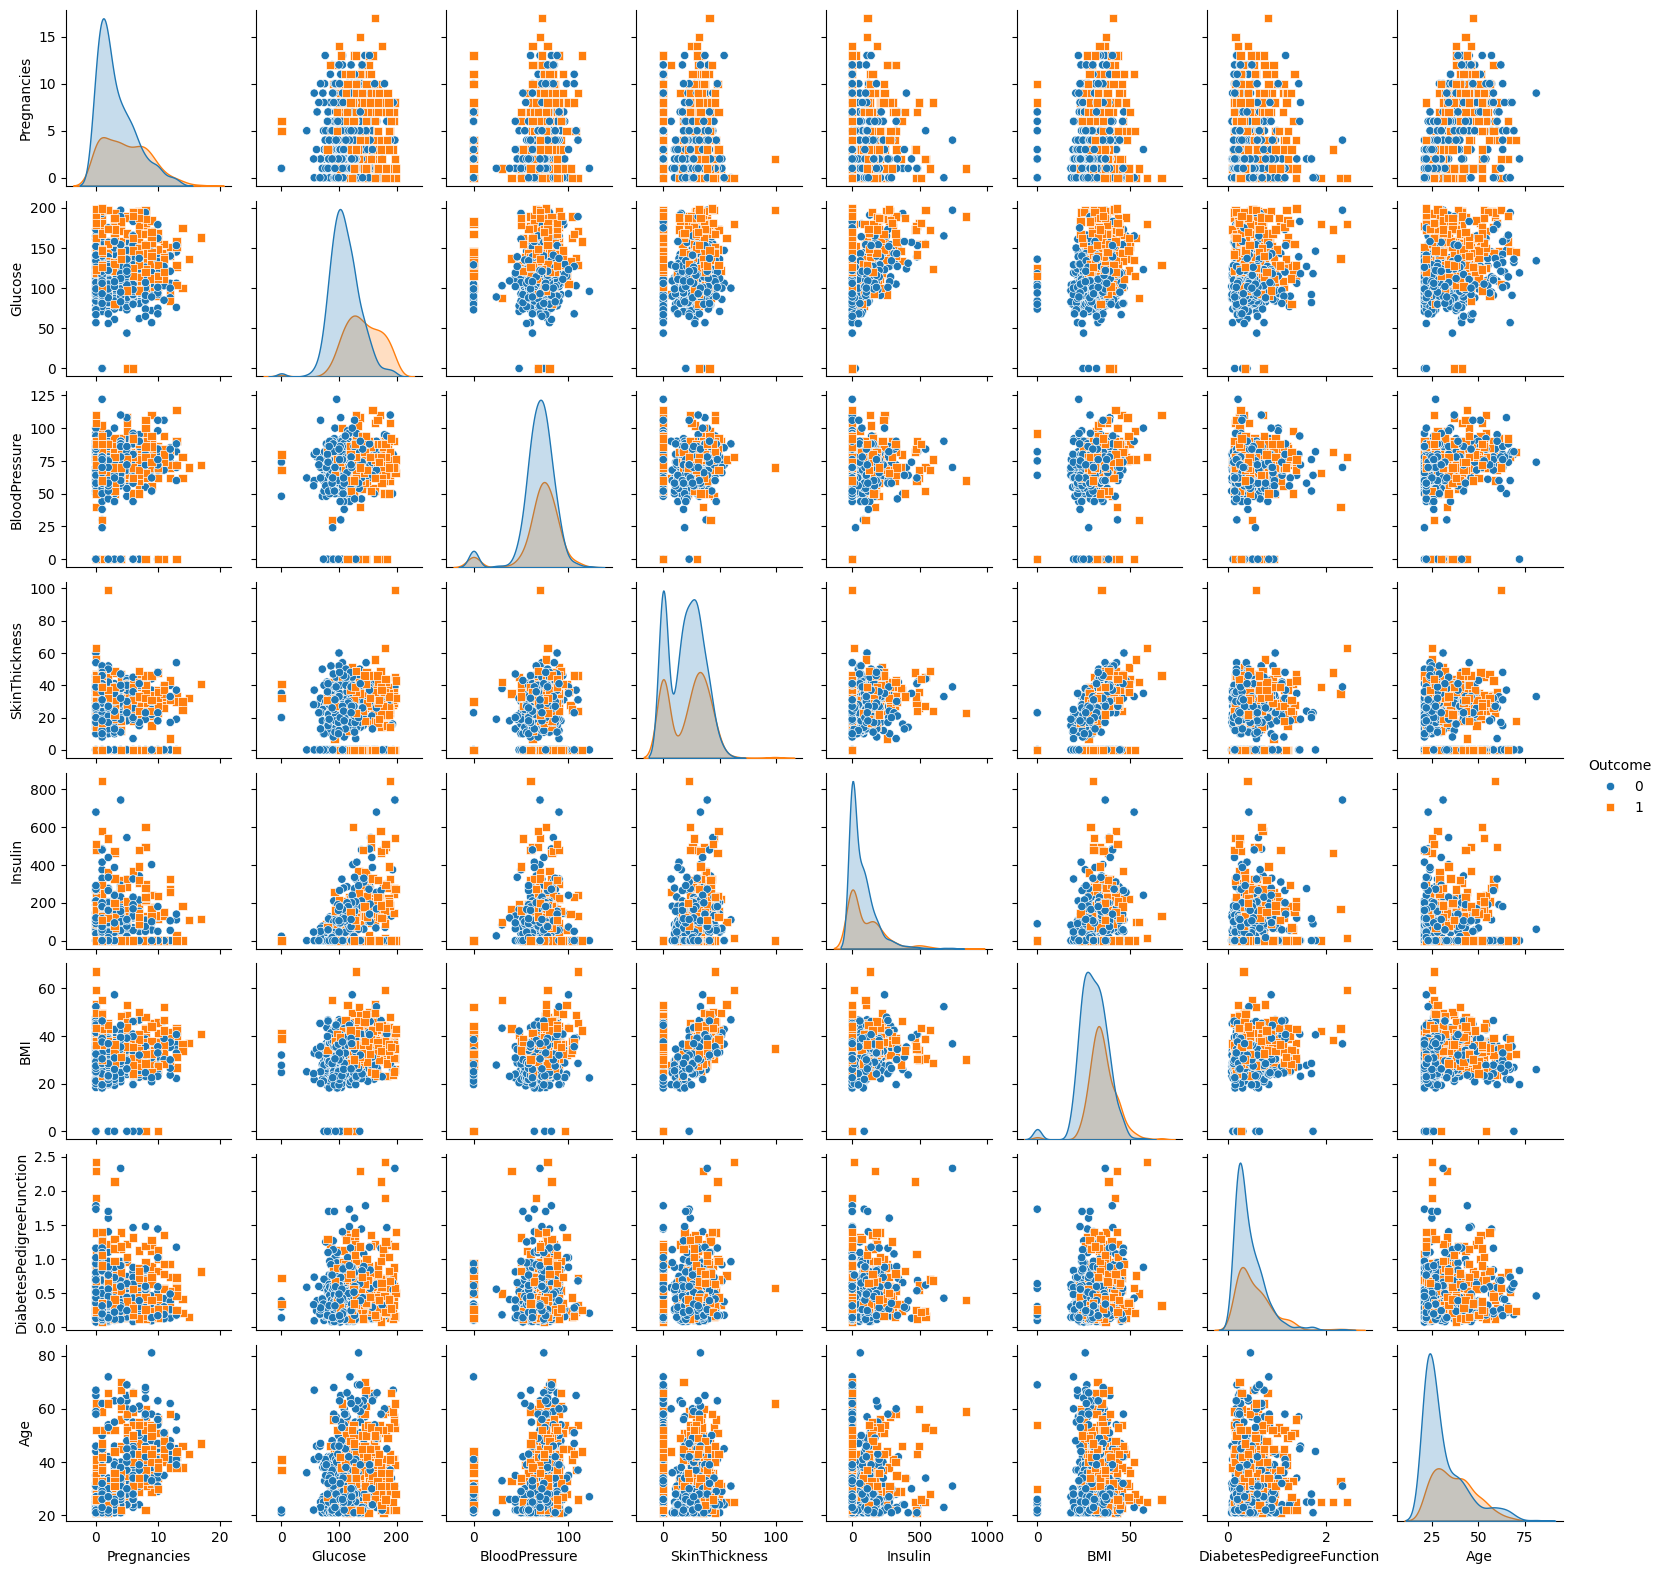

In [11]:
plt.figure()
sns.pairplot(dataset, hue = "Outcome", height=2, markers=["o", "s"])
plt.show()

In [12]:
# # Tạo từng cặp biểu đồ riêng cho mỗi cặp trong dataset
# for i, column1 in enumerate(dataset.columns):
#     for j, column2 in enumerate(dataset.columns):
#         if i != j:
#             plt.figure()
#             sns.scatterplot(x=column1, y=column2, hue="Outcome", data=dataset)
#             plt.xlabel(column1)
#             plt.ylabel(column2)
#             plt.title(f"{column1} vs {column2}")
#             plt.show()


####  Boxplots

<Figure size 640x480 with 0 Axes>

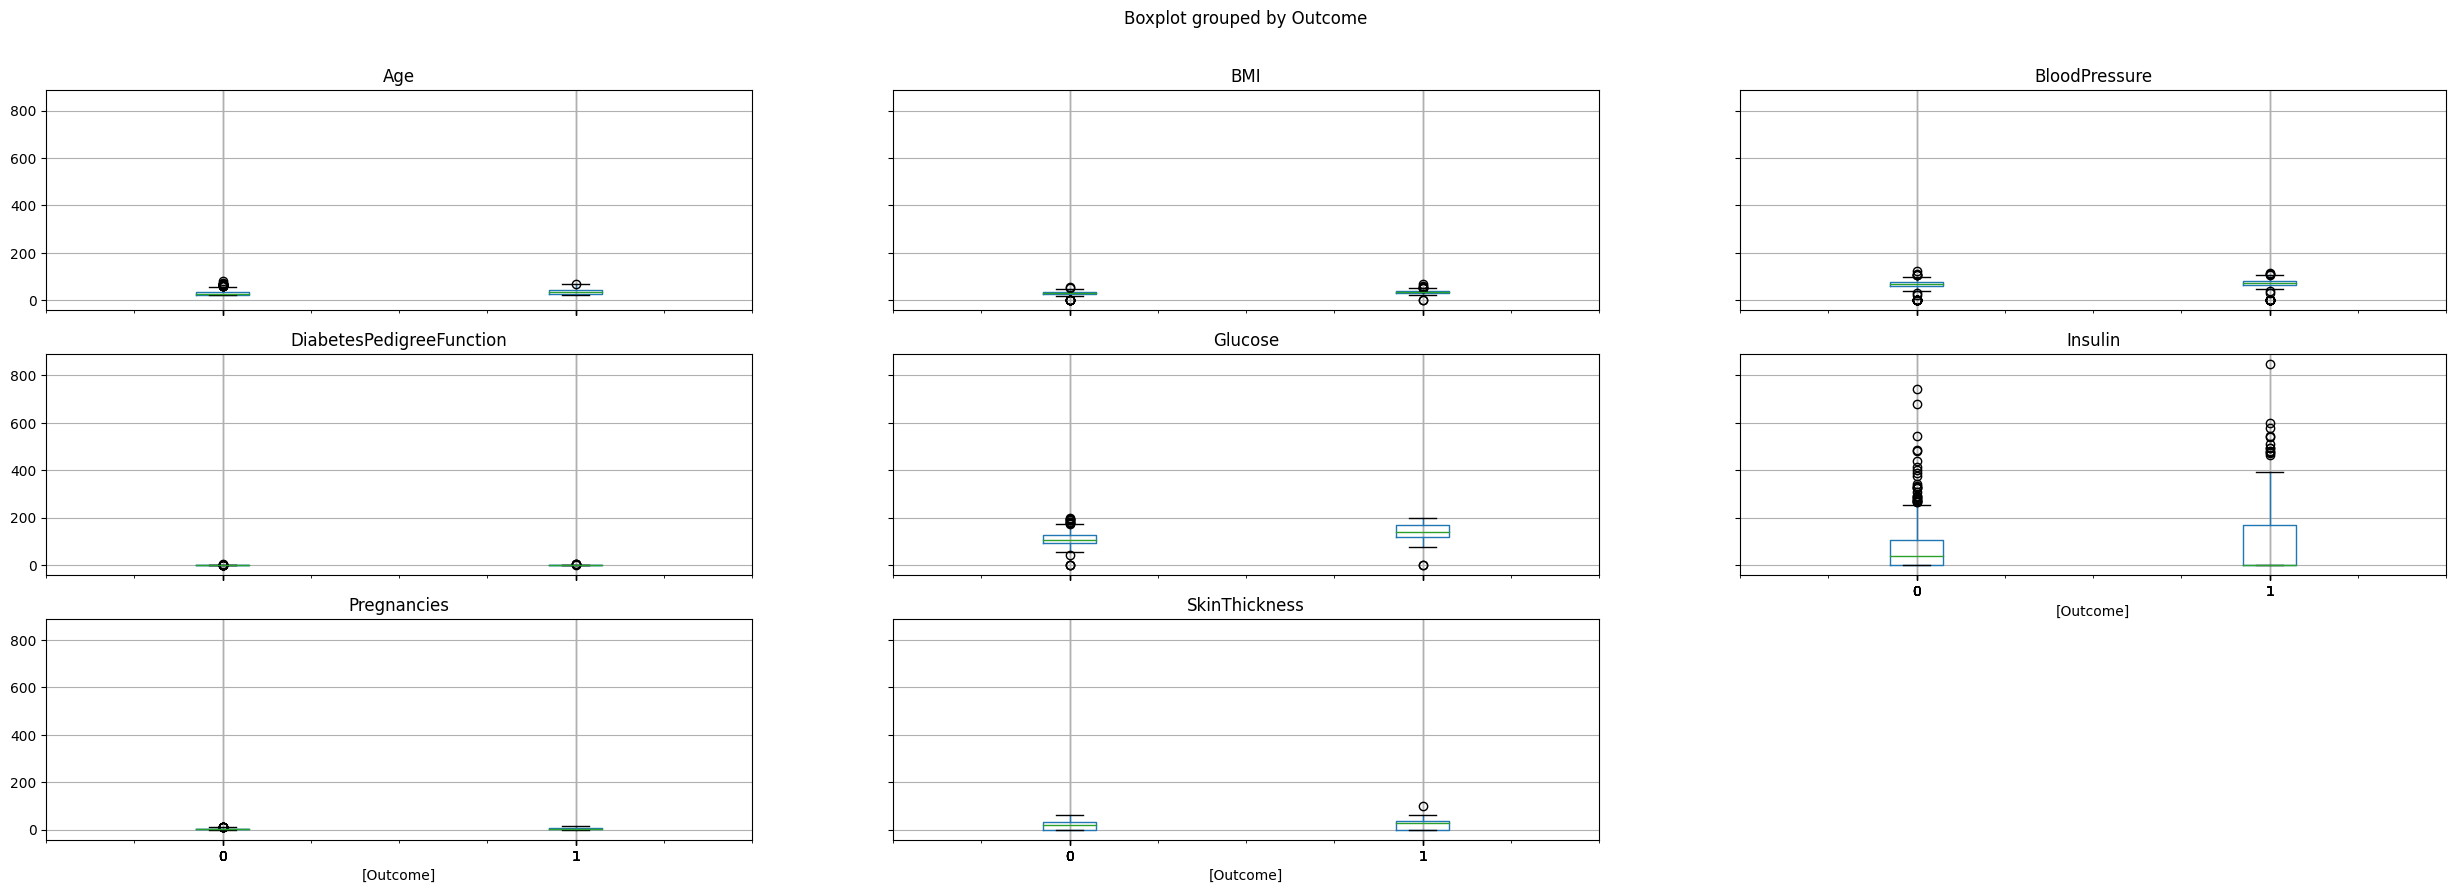

In [13]:
plt.figure()
dataset.boxplot(by="Outcome", figsize=(30, 10))
plt.show()

## 2) Data preprocessing

### 2.1 Xác định  ``features`` và ``labels``

In [14]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
X = dataset[feature_columns].values
y = dataset['Outcome'].values


### 2.2 Encoding (Lable Encoding)

``Outcome`` (label) là  0,1 variables. Do đó chúng ta không phải chuyển đổi thành số trước khi đưa vào cho KNeighborsClassifier

In [15]:
# Don't need label encoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

### 2.3 Chia dữ liệu

- training set: dùng để xây dựng classifier
- test set: sẽ được sử dụng để evaluate liệu  classifier  tốt hay không
- 80% cho training set và 20% cho test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 2.4 Thống kê hai tập dữ liệu

In [17]:
X_train.shape #614 rows dùng để train(80%)

(614, 8)

In [18]:
y_train.shape

(614,)

In [19]:
X_test.shape #154 rows dùng để test (20%)

(154, 8)

In [20]:
y_test.shape

(154,)

## 3) Sử dụng KNN for classification

###  3.1 Xây dựng model

In [21]:
# Vì trong KNN không có khái niệm training model nên bước này không cần phải thực hiện

### 3.2 Standardization - Chuẩn hoá dữ liệu

In [22]:


# Khởi tạo một StandardScaler
scaler = StandardScaler()

# Fit và transform dữ liệu huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

# Transform dữ liệu kiểm tra (sử dụng mean và độ lệch chuẩn từ dữ liệu huấn luyện)
X_test_scaled = scaler.transform(X_test)


### 3.3 Vấn đề liên quan đến K

#### Thay đổi ``k`` để tìm ``k`` phù hợp

In [23]:

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

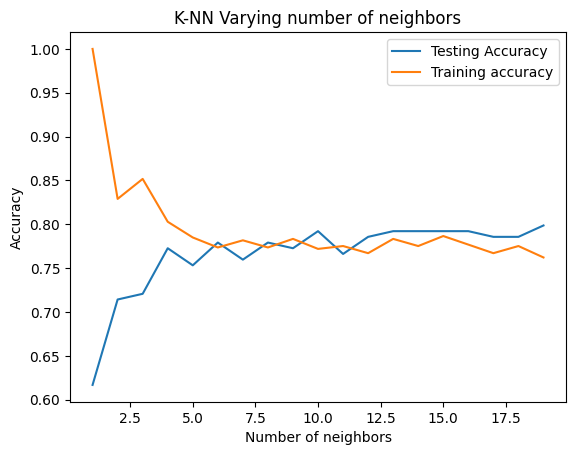

In [24]:
#Generate plot
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [25]:
# Từ biễu đồ trên, chọn k = 10 để được kết quả chính xác cao

### 3.4 Vấn đề liên quan đến Distance Method

In [26]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,6)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with different distance methods
    if i == 1:
        knn = KNeighborsClassifier(n_neighbors=10, metric="euclidean")
    elif i == 2:
        knn = KNeighborsClassifier(n_neighbors=10, metric="manhattan")
    elif i == 3:
        knn = KNeighborsClassifier(n_neighbors=10, metric="chebyshev")
    elif i == 4:
        knn = KNeighborsClassifier(n_neighbors=10, metric="cosine")
    else:
        knn = KNeighborsClassifier(n_neighbors=10, p = 100, metric="minkowski")



    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

#### Thống kê

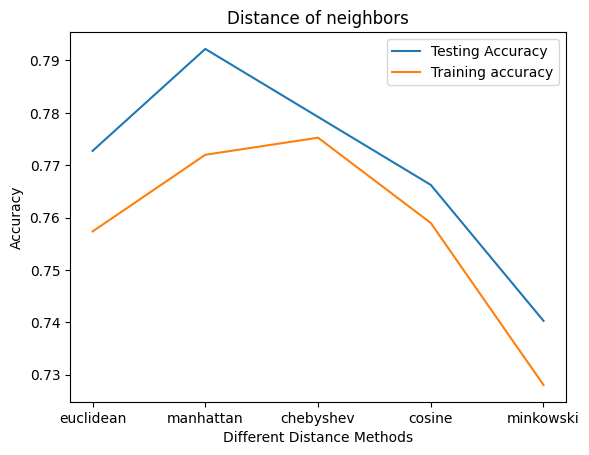

In [27]:
#Generate plot
label_mapping = {1: 'euclidean', 2: 'manhattan', 3: 'chebyshev', 4: 'cosine', 5: 'minkowski'}
neighbors = [1, 2, 3, 4, 5]
neighbors_labels = [label_mapping[num] for num in neighbors]
plt.title('Distance of neighbors')
plt.plot(neighbors_labels, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors_labels, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Different Distance Methods')
plt.ylabel('Accuracy')
plt.show()

### 3.5 Vấn đề trọng số

In [28]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,3)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with different weights methods
    if i == 1:
        knn = KNeighborsClassifier(n_neighbors=10, weights="distance")
    else:
        knn = KNeighborsClassifier(n_neighbors=10, weights="uniform")



    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

#### Thống kê

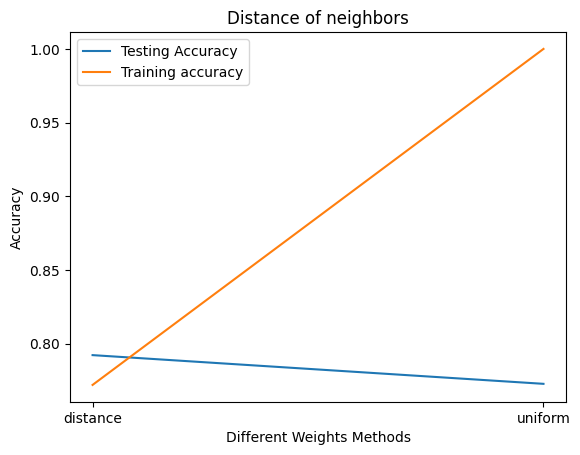

In [29]:
#Generate plot
label_mapping = {1: 'distance', 2: 'uniform'}
neighbors = [1, 2]
neighbors_labels = [label_mapping[num] for num in neighbors]
plt.title('Distance of neighbors')
plt.plot(neighbors_labels, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors_labels, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Different Weights Methods')
plt.ylabel('Accuracy')
plt.show()

## 3.6 Thực hiện KNN cho các bước mẫu

#### 3.6.1 Tạo KNN và thực hiện huấn luyện - fit

In [30]:
# Tạo model (k = 1)
classifier = KNeighborsClassifier(n_neighbors=10)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

####  3.6.2 Dự Đoán - Prediction

In [31]:
# Predicting on the test set
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

####  3.6.3 Xây dựng Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

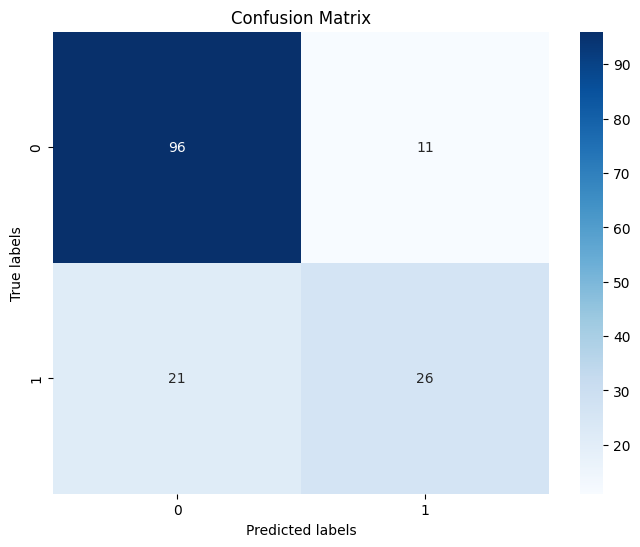

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

####  3.6.4 Tính toán thống kê cho Confusion Matrix

In [33]:
# Tính toán recall, precision và F1-score
true_positives = cm[1, 1]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]

recall = true_positives / (true_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Hiển thị các thông số
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1_score)

Recall: 0.5531914893617021
Precision: 0.7027027027027027
F1-score: 0.6190476190476191


####  3.6.4 Độ chính xác

Cách 1:

In [34]:
#Sử dụng hàm accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 79.22 %.


Cách 2:

In [35]:
# Tính accuracy bằng tay dựa trên confusion matrix
acccuracy_byhand = (96+26)/(11+21+96+26+0+0+0)
acccuracy_byhand

0.7922077922077922

## 4 Cách tiếp cận các phương pháp tối ưu

In [36]:
# nhân tập cũ lên 100 lần
# Nhân mỗi bản ghi lên 100 lần và gộp chúng lại thành một tập dữ liệu mới
larger_dataset = pd.concat([dataset] * 5000, ignore_index=True)


In [37]:
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [38]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
larger_x = larger_dataset[feature_columns].values
larger_y = larger_dataset['Outcome'].values
larger_x_train, larger_x_test, larger_y_train, larger_y_test = train_test_split(larger_x, larger_y, test_size = 0.2, random_state = 0)

#### 4.1 Phương pháp tối ưu không được sử dụng

In [39]:
# Bắt đầu đo thời gian
start_time = time.time()

# Tạo model (k = 1)
classifier = KNeighborsClassifier(n_neighbors=10)

# Fitting the model
classifier.fit(larger_x_train, larger_y_train)

# Dừng đo thời gian và tính thời gian thực hiện
end_time = time.time()
execution_time = end_time - start_time

print("Thời gian tính toán của KNN:", execution_time, "giây")


Thời gian tính toán của KNN: 16.305020093917847 giây


In [40]:
#Thống kê thời gian
times = []
times.append(execution_time)

#### 4.2 Phương pháp tối ưu sử dụng KD Tree

In [41]:
# Import thư viện KNeighborsClassifier và thời gian

# Bắt đầu đo thời gian
start_time = time.time()

# Tạo model (k = 10) và sử dụng kd tree
classifier = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree', leaf_size=100000)

# Huấn luyện mô hình
classifier.fit(larger_x_train, larger_y_train)

# Dừng đo thời gian và tính thời gian thực hiện
end_time = time.time()
execution_time = end_time - start_time

times.append(execution_time)
print("Thời gian tính toán của KNN với kd tree 100000 leaf:", execution_time, "giây")

Thời gian tính toán của KNN với kd tree 100000 leaf: 5.544565200805664 giây


In [42]:
# Import thư viện KNeighborsClassifier và thời gian

# Bắt đầu đo thời gian
start_time = time.time()

# Tạo model (k = 10) và sử dụng kd tree
classifier = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree', leaf_size=1000000)

# Huấn luyện mô hình
classifier.fit(larger_x_train, larger_y_train)

# Dừng đo thời gian và tính thời gian thực hiện
end_time = time.time()
execution_time = end_time - start_time

times.append(execution_time)
print("Thời gian tính toán của KNN với kd tree 1000000 leaf:", execution_time, "giây")

Thời gian tính toán của KNN với kd tree 1000000 leaf: 1.0994765758514404 giây


#### 4.3 Phương pháp tối ưu sử dụng Ball Tree

In [43]:
# Import thư viện KNeighborsClassifier và thời gian

# Bắt đầu đo thời gian
start_time = time.time()

# Tạo model (k = 10) và sử dụng kd tree
classifier = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree', leaf_size=100000)

# Huấn luyện mô hình
classifier.fit(larger_x_train, larger_y_train)

# Dừng đo thời gian và tính thời gian thực hiện
end_time = time.time()
execution_time = end_time - start_time

times.append(execution_time)
print("Thời gian tính toán của KNN với ball tree 100000 leaf:", execution_time, "giây")

Thời gian tính toán của KNN với ball tree 100000 leaf: 4.9065656661987305 giây


In [44]:
# Import thư viện KNeighborsClassifier và thời gian

# Bắt đầu đo thời gian
start_time = time.time()

# Tạo model (k = 10) và sử dụng kd tree
classifier = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree', leaf_size=1000000)

# Huấn luyện mô hình
classifier.fit(larger_x_train, larger_y_train)

# Dừng đo thời gian và tính thời gian thực hiện
end_time = time.time()
execution_time = end_time - start_time

times.append(execution_time)
print("Thời gian tính toán của KNN với ball tree 1000000 leaf:", execution_time, "giây")

Thời gian tính toán của KNN với ball tree 1000000 leaf: 0.912600040435791 giây


#### 4.4 Hiển thị kết quả so sánh giữa các phương pháp

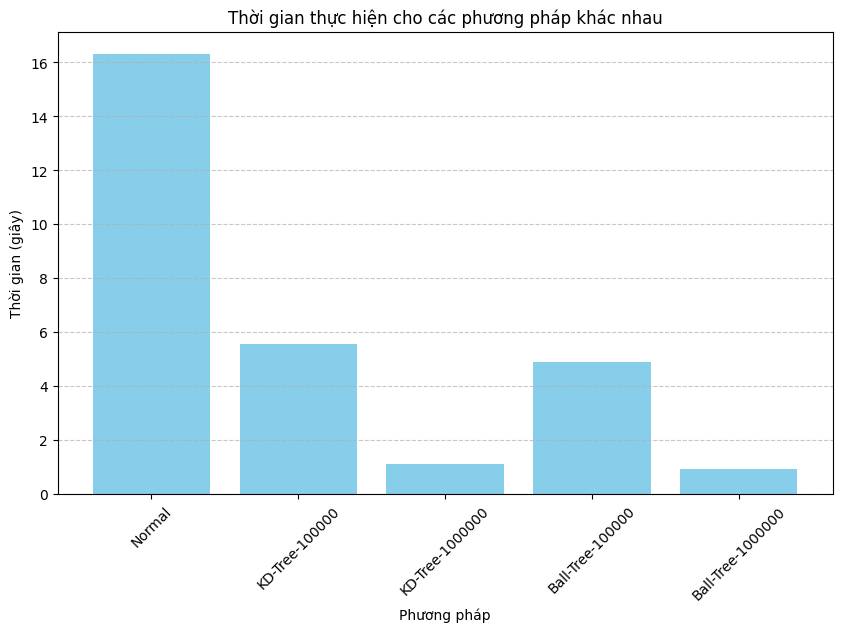

In [45]:
import matplotlib.pyplot as plt

# Tên các phương pháp
methods = ['Normal', 'KD-Tree-100000','KD-Tree-1000000', 'Ball-Tree-100000', 'Ball-Tree-1000000']

# Thời gian cho từng phương pháp (ví dụ)

# Hiển thị đồ thị
plt.figure(figsize=(10, 6))
plt.bar(methods, times, color='skyblue')
plt.xlabel('Phương pháp')
plt.ylabel('Thời gian (giây)')
plt.title('Thời gian thực hiện cho các phương pháp khác nhau')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 5) Kết Luận

In [46]:
# Như vậy các bước thực hiện KNN và ưu nhược điểm của từng phương pháp đã được tính toán và hiển thị
# Dễ nhận thấy là độ chính xác của KNN rơi vào khoảng 80%. Đây là độ chính xác chấp nhận được
# Độ chính xác có thê thay đổi khi thực nghiệm thay đổi K, Distance Method, Phương pháp trọng số
# Để tối ưu và giúp thuật toán chạy nhanh hơn, có thể sử dụng KD-Tree, Ball-Tree
# Ngoài ra tối ưu còn được sử dụng bằng các phương pháp Hashing như LSH. Nhưng phương pháp này nằm ngoài
# phạm vi nghiên cứu và chưa được kiểm tra thực nghiệm trong nghiên cứu này.